---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 6

---

- **Name** : amgad atef abd elhakem shaban

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 1:  Data Reading and Preprocessing

## Explore data

In [2]:
#read the data and split it using ;
cardio_train_df=pd.read_csv("cardio_train.csv",sep=';')
#print data information and first five elements
print(cardio_train_df.info())
cardio_train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### see which columns is continuous and witch is discrete

In [3]:
#print the data in each column associated with the number of rebitation
for col in cardio_train_df.columns:
    print(f"Column: {col}")
    value_counts = cardio_train_df[col].value_counts()
    print(value_counts)
    print("-------------------------")

Column: id
id
0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: count, Length: 70000, dtype: int64
-------------------------
Column: age
age
19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: count, Length: 8076, dtype: int64
-------------------------
Column: gender
gender
1    45530
2    24470
Name: count, dtype: int64
-------------------------
Column: height
height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: count, Length: 109, dtype: int64
-------------------------
Column: weight
weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: count, Length: 287, dtype: int64
-------------------------
Column: ap_hi
ap_hi
 120     27699
 140

### plot continuous columns to detect outlier

Column: ap_lo


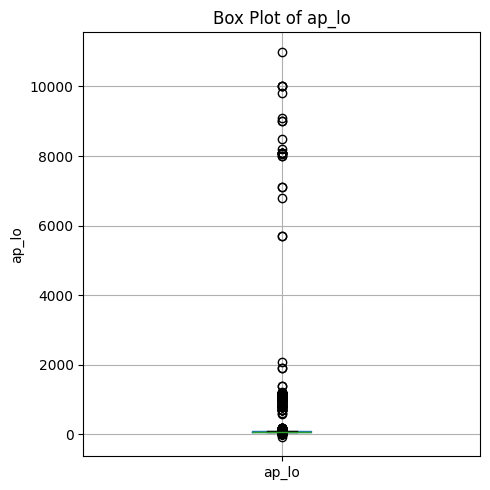

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64
-------------------------
Column: ap_hi


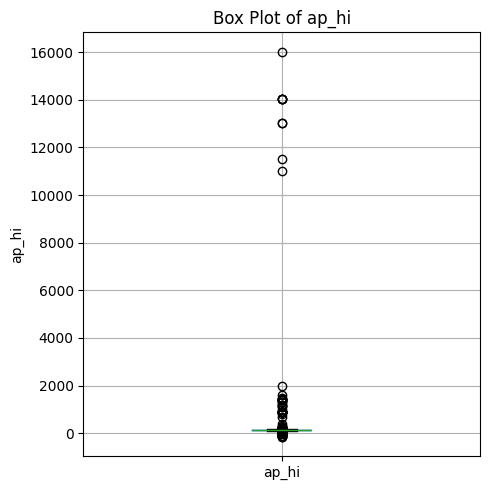

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64
-------------------------
Column: weight


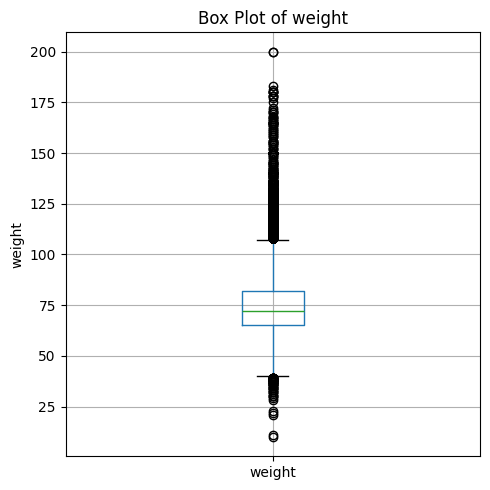

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64
-------------------------
Column: height


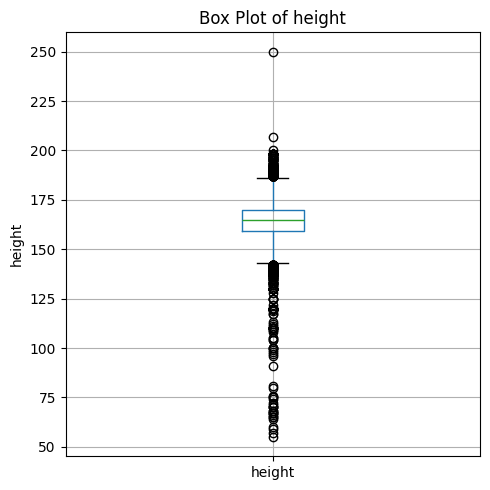

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64
-------------------------
Column: age


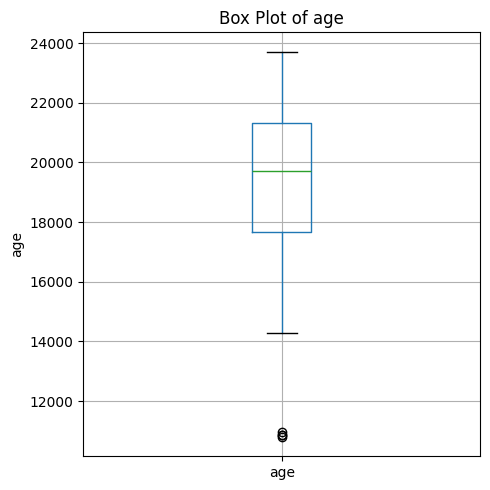

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64
-------------------------


In [4]:
#choose only continuous columns to plot
columns_to_plot=["ap_lo","ap_hi","weight","height","age"]
for col in columns_to_plot:
    fig, axes = plt.subplots(figsize=(5, 5))
    print(f"Column: {col}")
    # Get the description of the values in each column (max,min,mean, etc)
    describe = cardio_train_df[col].describe()
    cardio_train_df.boxplot(col, ax=axes)
    axes.set_title(f'Box Plot of {col}')
    axes.set_ylabel(col)
    plt.tight_layout()
    plt.show()
    print(describe)
    print("-------------------------")


## Data cleaning

### remove outlier from ap_hi and ap_lo

values bigger than 400 is outlier as the highest measured blood pressure is 370 and there is no blood pressure in negative

In [5]:
cardio_train_df = cardio_train_df[cardio_train_df["ap_hi"] < 400]
cardio_train_df = cardio_train_df[cardio_train_df["ap_lo"] < 400]
cardio_train_df = cardio_train_df[cardio_train_df["ap_hi"] > 0]
cardio_train_df = cardio_train_df[cardio_train_df["ap_lo"] > 0]

### convert ap_hi,ap_lo, age, weight and height into discrete 

categorize the ap_hi to 3 categories:

1) -1 for less than 90 

2) 0 for between 90 and 140 

3) 1 for bigger than 140

In [6]:
def discretize_ap_hi(value):
    if value < 90 :
        return -1
    elif value<140:
        return 0
    else:
        return 1

cardio_train_df["ap_hi"] = cardio_train_df["ap_hi"].apply(discretize_ap_hi)


categorize the ap_lo to 3 categories:

1) -1 for less than 60 

2) 0 for between 60 and 90 

3) 1 for bigger than 90

In [7]:
def discretize_ap_lo(value):
    if value < 60 :
        return -1
    elif value<90:
        return 0
    else:
        return 1

cardio_train_df["ap_lo"] = cardio_train_df["ap_lo"].apply(discretize_ap_lo)


categorize the age to 4 categories:

1) 1 for less than 30 years 

2) 2 for between 30 and 42 years 

2) 3 for between 42 and 54 years 

3) 4 for bigger than 54 years

In [8]:
def discretize_age(value):
    if value < 30*365 :
        return 1
    elif value<42*365:
        return 2
    elif value<54*365:
        return 3
    else:
        return 4

cardio_train_df["age"] = cardio_train_df["age"].apply(discretize_age)

categorize the weight to 4 categories:

1) 1 for less than 50 Kg 

2) 2 for between 50 and 100 Kg 

2) 3 for between 100 and 150 Kg 

3) 4 for bigger than 150 Kg

In [9]:
def discretize_weight(value):
    if value < 50 :
        return 1
    elif value<100:
        return 2
    elif value<150:
        return 3
    else:
        return 4

cardio_train_df["weight"] = cardio_train_df["weight"].apply(discretize_weight)

categorize the weight to 4 categories:

1) 1 for less than 150 cm 

2) 2 for between 150 and 175 cm 

2) 3 for bigger than 175 cm


In [10]:
def discretize_height(value):
    if value < 150 :
        return 1
    elif value<175:
        return 2
    else:
        return 3

cardio_train_df["height"] = cardio_train_df["height"].apply(discretize_height)

get the value_counts() after categorization

In [11]:
for col in cardio_train_df.columns:
    print(f"Column: {col}")
    value_counts = cardio_train_df[col].value_counts()
    print(value_counts)

Column: id
id
0        1
66632    1
66614    1
66615    1
66617    1
        ..
33340    1
33341    1
33342    1
33343    1
99999    1
Name: count, Length: 68985, dtype: int64
Column: age
age
4    34306
3    29426
2     5250
1        3
Name: count, dtype: int64
Column: gender
gender
1    44932
2    24053
Name: count, dtype: int64
Column: height
height
2    60237
3     7235
1     1513
Name: count, dtype: int64
Column: weight
weight
2    64280
3     3658
1      978
4       69
Name: count, dtype: int64
Column: ap_hi
ap_hi
 0    50191
 1    18487
-1      307
Name: count, dtype: int64
Column: ap_lo
ap_lo
 0    49363
 1    19469
-1      153
Name: count, dtype: int64
Column: cholesterol
cholesterol
1    51747
2     9339
3     7899
Name: count, dtype: int64
Column: gluc
gluc
1    58650
3     5247
2     5088
Name: count, dtype: int64
Column: smoke
smoke
0    62924
1     6061
Name: count, dtype: int64
Column: alco
alco
0    65288
1     3697
Name: count, dtype: int64
Column: active
active
1    55

### feature selection 

Selected Features: ['ap_hi', 'ap_lo', 'cholesterol', 'age']



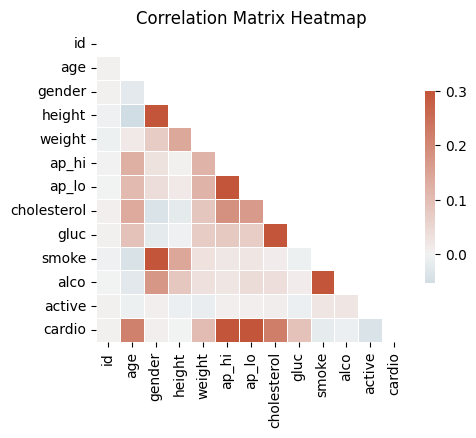

In [12]:
import seaborn as sns
#calculate correlation matrix
corr_matrix = cardio_train_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap')
#sort correlation value with the cardio column
corr_with_target = corr_matrix['cardio'].abs().sort_values(ascending=False)
#choose correlation value bigger than 0.2 and smaller than 1(to remove cardio column)
selected_features = corr_with_target[(corr_with_target > 0.2) & (corr_with_target < 1)].index.tolist()

print(f"Selected Features: {selected_features}\n")

plt.show()

# Part 2: Decision Tree implementation using ID3 algorithm

### Decision Tree code


entropy function


In [13]:
def entropy_of_column(y):
    entropy=0 #intialize entropy with 0
    for i in y.value_counts().values:
        probabilities=(i/y.shape[0])
        entropy-=probabilities*np.log2(probabilities)
    return entropy

rem function

In [14]:
def rem(dataframe,target,column):
    rem_value=0 #intialize rem with 0
    values_entropy_dic={}
    #loop in column values
    for value in dataframe[column].unique():
        # get the data in witch the column value equal iterator variable value to calculated column entropy
        data_equal_value=dataframe[dataframe[column]==value]
        #calculated column entropy
        value_entropy=entropy_of_column(data_equal_value[target])
        #calculated column rem
        rem_value+=data_equal_value.shape[0]/dataframe.shape[0]  * value_entropy
        #append the value of the entropy to use it later without another calculation
        values_entropy_dic[value]=value_entropy
    return rem_value,values_entropy_dic

calculate the information gain for each column in data

In [15]:
def information_gain(dataframe,target):
    IG={}
    columns_values_entropy={}
    entropy_of_target=entropy_of_column(dataframe[target])
    for column in dataframe.columns:
        if(column!=target):
            column_rem,columns_values_entropy[column]=rem(dataframe=dataframe,target=target,column=column)
            IG[column]=entropy_of_target-column_rem
    return IG,columns_values_entropy

# create node class

In [16]:
class Node:
    def __init__(self, parent,value,depth,num,result=None):
        self.parent = parent
        self.children = []
        self.value=value
        self.question=None #splitting in the values of this column

        # equal None if node in the middle
        # equal one if pure node 
        # equal the biggest class if leaf and not pure
        self.result=result
        self.depth=depth
        self.num=num

# create Decision_Tree class

In [17]:
class Decision_Tree:
    def __init__(self):
        self.training_dataframe=None
        self.working_point={} # for point which will be splitted with its data and probability of biggest class
        self.root=Node(parent=None,value=None,depth=0,num=0)
        
    def fit(self,X,y,max_depth,max_nodes):
        self.training_dataframe=pd.concat([X, y], axis=1)
        i=1 # the number of node
        self.working_point[self.root]=[1,self.training_dataframe]
        while(self.working_point):
            #sort nodes in ascending order by probability of biggest class
            self.working_point=dict(sorted(self.working_point.items(), key=lambda x: x[1][0]))
            #get the first node
            current_node=list(self.working_point.keys())[0]
            node_data=self.working_point.pop(current_node)[1]
            #calculate the information gain of the all columns of this point data
            IG,columns_values_entropy=information_gain(node_data,node_data.columns[-1])
            #choose the column with max information gain
            column_with_min_IG=max(IG, key=IG.get)
            current_node.question=column_with_min_IG
            #loop over chosen column values to make node's children
            for value,entropy in columns_values_entropy[column_with_min_IG].items():
                if (entropy == 0):#pure node
                    new_node=Node(num=i,parent=current_node,value=value,depth=current_node.depth+1,result=node_data[node_data[column_with_min_IG]==value][node_data.columns[-1]].value_counts().idxmax())
                    i+=1
                else:
                    new_node_data=node_data.drop(columns=[column_with_min_IG])[node_data[column_with_min_IG]==value]
                    if(len(new_node_data.columns)==1 or current_node.depth+1>max_depth or i>max_nodes):#some stopping criteria
                        new_node=Node(num=i,parent=current_node,value=value,depth=current_node.depth+1,result=node_data[node_data[column_with_min_IG]==value][node_data.columns[-1]].value_counts().idxmax())
                        i+=1
                    elif(len(new_node_data.columns)>1):
                        new_node=Node(num=i,parent=current_node,value=value,depth=current_node.depth+1)
                        i+=1
                        self.working_point[new_node]=[node_data[node_data[column_with_min_IG]==value][node_data.columns[-1]].value_counts().idxmax()/node_data[node_data[column_with_min_IG]==value][node_data.columns[-1]].count(),new_node_data]
                current_node.children.append(new_node)
                
                                        
    def predict(self,X):
        results=[]
        #loop over X points
        for i in range(len(X)):
            cur_node=self.root
            while(len(cur_node.children)!=0):#stop when the current node has no children
                for child in cur_node.children:
                    #if the value of the node equal the value in the point column move to this point
                    if(X.iloc[i][cur_node.question]==child.value):
                        cur_node=child
                        break
            results.append(cur_node.result)
        return results

    def score(self,X,y):
        correct_count=0
        #loop over X points
        for i in range(len(X)):
            cur_node=self.root
            while(len(cur_node.children)!=0):#stop when the current node has no children
                for child in cur_node.children:
                    #if the value of the node equal the value in the point column move to this point
                    if(X.iloc[i][cur_node.question]==child.value):
                        cur_node=child
                        break
            #if the value of the predict equal the value of y increase correct_count
            if(cur_node.result==y.iloc[i]):
                correct_count+=1
        return correct_count/len(y) #return acurrecy





# split the data

In [18]:
from sklearn.model_selection import train_test_split


X=cardio_train_df[selected_features]
y=cardio_train_df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train from scratch model

In [19]:
Decision_Tree_model=Decision_Tree()
Decision_Tree_model.fit(X=X_train,y=y_train,max_depth=4,max_nodes=250)

print train and test accurrecy of from scratch model

In [20]:
print(f"train accurrecy = {Decision_Tree_model.score(X=X_train,y=y_train)}")
print(f"test accurrecy = {Decision_Tree_model.score(X=X_test,y=y_test)}")

train accurrecy = 0.7203739943465971
test accurrecy = 0.715590345727332


# part 3: Decision Tree Id3Estimator 

import id3 library (this part from code while not work if it is runned again as it will not found the library)

In [21]:
from id3 import Id3Estimator

train built_in model

In [22]:
id3_built_in=Id3Estimator()
id3_built_in.fit(X=X_train,y=y_train)

Id3Estimator()

print train and test accurrecy of built_in model

In [23]:
y_train_pred = id3_built_in.predict(X=X_train)
y_test_pred = id3_built_in.predict(X=X_test)

print(f"train accurrecy = {(y_train_pred==y_train).mean()}")
print(f"test accurrecy = {(y_test_pred==y_test).mean()}")

train accurrecy = 0.7193592810031166
test accurrecy = 0.7151554685801261


# part 4: Decision Tree from scratch on Student dataset

read student dataset

In [24]:
student_df=pd.read_csv("student.csv")
X=student_df.drop(columns=["A"])
y=student_df["A"]

train from_scratch model

In [25]:
Decision_Tree_model=Decision_Tree()
Decision_Tree_model.fit(X=X,y=y,max_depth=100,max_nodes=200)

print accurrecy of from_scratch model

In [26]:
print(f"train {Decision_Tree_model.score(X=X,y=y)}")

train 1.0
